##**David Alejandro Vásquez Franco**

##**CC 1000921301**

<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_01_pandas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


# **Solución**

## **1. Leer el dataset desde el github**

In [1]:
import pandas as pd

# URL del dataset
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

# Carga de datos
df = pd.read_csv(url)
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


## **2. Definir como indice la columna time.**

In [2]:
# Convertir la columna 'time' al formato estándar de fecha y hora (datetime)
df['time'] = pd.to_datetime(df['time'])

# Establecer la columna 'time' como el índice del DataFrame
df.set_index('time', inplace=True)
df

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


## **3. Obtenga información del data frame.**

In [3]:
# Info del DataFrame (índice, columnas y tipos de datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


## **4. Determine si hay null, nan en el data frame.**

In [4]:
# Contabilizar la cantidad de valores nulos
print(df.isnull().sum())

Unnamed: 0            0
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64


## **5. Emplea la notación Pascal Case y trabaja solo con la columna del precio de cierre del eur/usd.**

In [5]:
# Selección de la columna de interés y creación de una copia para el nuevo DataFrame
df_cierre = df[['close']].copy()

# Renombrar la columna a Pascal Case
df_cierre.columns = ['ClosePrice']

# Visualización de los primeros registros del nuevo DataFrame
print(df_cierre.head())

                     ClosePrice
time                           
2022-07-25 13:00:00     1.02345
2022-07-25 14:00:00     1.02299
2022-07-25 15:00:00     1.02457
2022-07-25 16:00:00     1.02485
2022-07-25 17:00:00     1.02181


## **6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:**
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

- Para la nueva columna construya un histograma de los datos.

- Determine la mejor distribucion estadística que se ajusta al histograma anterior.

In [6]:
!pip install fitter

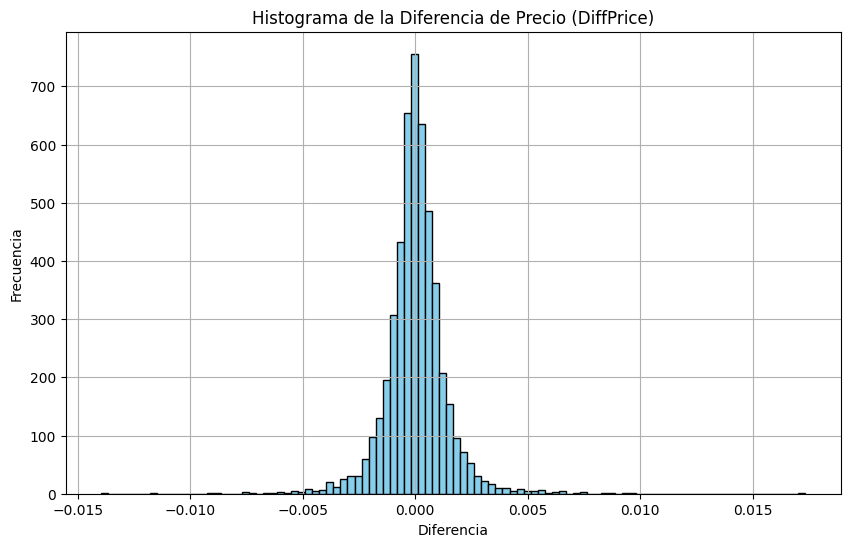


--- Resumen de ajuste de distribuciones ---
         sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm    106500.661168  3074.521081  3094.072060     inf      0.091597   
beta       106677.525909  3161.199039  3187.267011     inf      0.090756   
norm       106744.023571  3180.994184  3194.028170     inf      0.090533   
burr       721804.561088  -597.805954  -571.737982     inf      0.386409   
gamma      923360.482403  -376.348385  -356.797405     inf      0.591356   

            ks_pvalue  
lognorm  5.996555e-37  
beta     2.794092e-36  
norm     4.194767e-36  
burr     0.000000e+00  
gamma    0.000000e+00  

Mejor distribución encontrada:
{'lognorm': {'s': 0.009509964461157715, 'loc': -0.1471693008245066, 'scale': 0.14717494036949658}}

Parámetros de la distribución Beta:
(14613.868594375072, 27361.660606098114, -0.2096488866774875, 0.6022115067129248)


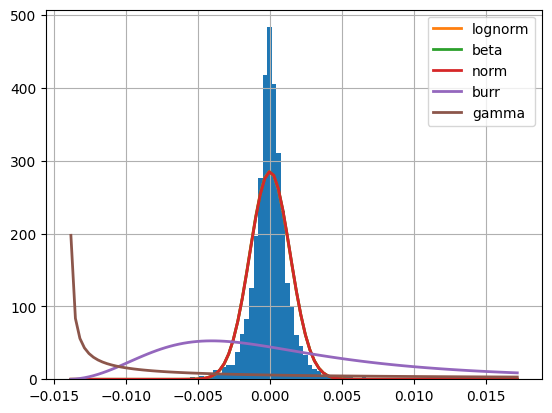

In [7]:
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt

# Calcular la diferencia de precio entre horas y añadir la columna DiffPrice
df_cierre['DiffPrice'] = df_cierre['ClosePrice'].diff()

# Eliminar el valor nulo (NaN) que se genera en la primera fila al restar
df_cierre.dropna(inplace=True)

# Histograma de la columna DiffPrice
plt.figure(figsize=(10, 6))
df_cierre['DiffPrice'].hist(bins=100, color='skyblue', edgecolor='black')
plt.title('Histograma de la Diferencia de Precio (DiffPrice)')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.show()

# Determinar la mejor distribución estadística
data = df_cierre['DiffPrice'].values

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          'beta',
                          'burr',
                          'norm'])
f.fit()

# Resumen de las distribuciones ajustadas
print("\n--- Resumen de ajuste de distribuciones ---")
print(f.summary())

# Identificar la mejor distribución con el error cuadrático medio (MSE)
print("\nMejor distribución encontrada:")
print(f.get_best(method = 'sumsquare_error'))

# Identificar los parámetros específicos para la distribución beta
print("\nParámetros de la distribución Beta:")
print(f.fitted_param["beta"])

## **7. Para el data frame, seleccionemos solo los datos del 2023.**

In [8]:
# Selección de registros que pertenecen al año 2023
df_2023 = df_cierre.loc['2023']

# Verificación
print(f"Inicio de los datos: {df_2023.index.min()}")
print(f"Fin de los datos: {df_2023.index.max()}")

Inicio de los datos: 2023-01-02 00:00:00
Fin de los datos: 2023-05-12 23:00:00


## **8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodicidad de 1 semana, y una periodicidad de 1 mes.**

In [9]:
# Promedio con periodicidad de 15 días
promedio_15d = df_2023['ClosePrice'].groupby(pd.Grouper(freq='15D')).mean()

# Promedio con periodicidad de 1 semana (W)
promedio_semanal = df_2023['ClosePrice'].groupby(pd.Grouper(freq='W')).mean()

# Promedio con periodicidad de 1 mes (ME)
promedio_mensual = df_2023['ClosePrice'].groupby(pd.Grouper(freq='ME')).mean()

# Promedio mensual como ejemplo
print("Promedio Mensual del Precio de Cierre:")
print(promedio_mensual)

Promedio Mensual del Precio de Cierre:
time
2023-01-31    1.077463
2023-02-28    1.071167
2023-03-31    1.070874
2023-04-30    1.096051
2023-05-31    1.098980
Freq: ME, Name: ClosePrice, dtype: float64


## **9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puede emplear el metodo groupby.**

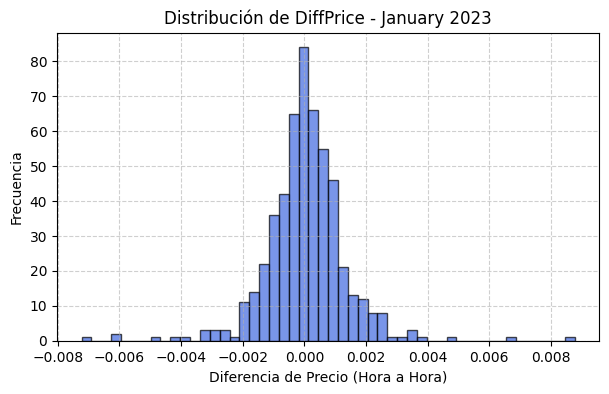

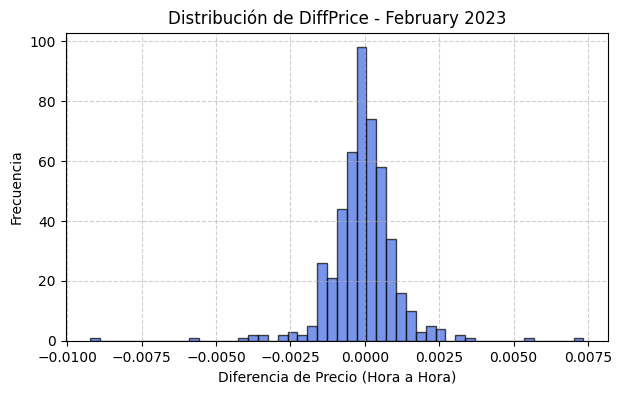

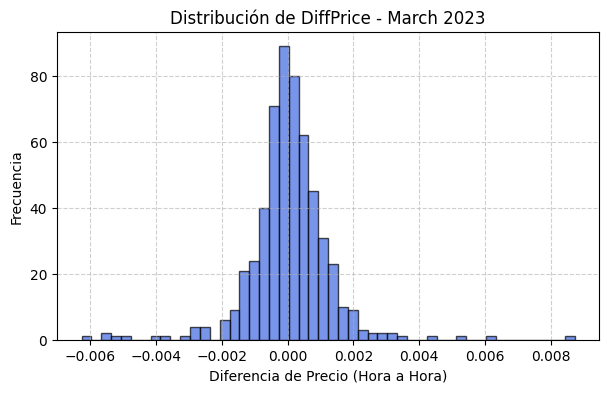

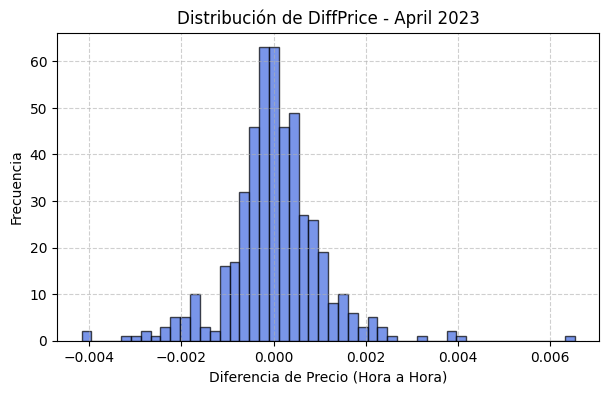

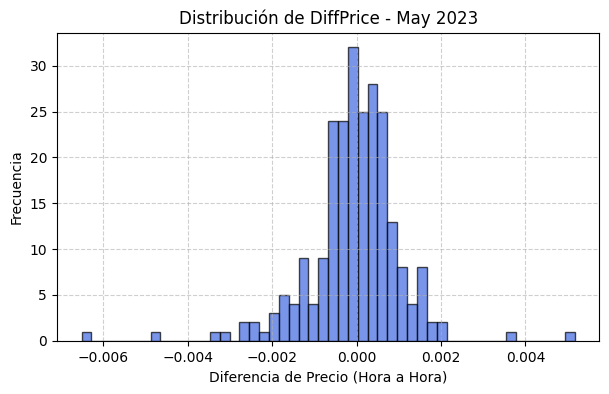

In [10]:
# Agrupamos los datos del 2023 por mes
q = df_2023.groupby(pd.Grouper(freq='ME'))

for name, group in q:
    plt.figure(figsize=(7, 4))

    # Graficamos DiffPrice en lugar de ClosePrice para ver la distribución de los cambios
    group['DiffPrice'].hist(bins=50, color='royalblue', edgecolor='black', alpha=0.7)

    # Formatear el título para mostrar el nombre del mes claramente
    plt.title(f'Distribución de DiffPrice - {name.strftime("%B %Y")}')
    plt.xlabel('Diferencia de Precio (Hora a Hora)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

-------------


## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.

2. Renombrar las columnas en formato PascalCase.

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.
   Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
   Utiliza el método `unique()` para mostrar estos valores.

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

```python
import seaborn as sns
sns.countplot?
```

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).


8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```



13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



# **Solución**

## **1. Leer los datos desde una página web.**

In [11]:
!pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

# Descargar el dataset directamente desde el repositorio UCI (ID 17)
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Extraer las características (X) y la variable objetivo (y)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Concatenar X y y en un único DataFrame llamado 'df' para el análisis
df = pd.concat([X, y], axis=1)

display(df.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


## **2. Renombrar las columnas en formato PascalCase.**

In [13]:
# Función para convertir de snake_case a PascalCase
def to_pascal_case(text):
    return ''.join(word.title() for word in text.split('_'))

# Aplicamos la función a la lista de columnas del DataFrame
df.columns = [to_pascal_case(col) for col in df.columns]
df


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


## **3. Utilizar los métodos head(), tail(), describe() y info() para obtener información sobre el DataFrame.**

In [14]:
print("--- Primeras 5 filas (head) ---")
display(df.head())

print("\n--- Últimas 5 filas (tail) ---")
display(df.tail())

print("\n--- Información general del DataFrame (info) ---")
df.info()

df.describe()

--- Primeras 5 filas (head) ---


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M



--- Últimas 5 filas (tail) ---


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B



--- Información general del DataFrame (info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 n

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## **4. Contabilizar la cantidad de valores nulos ( null o NaN ) en el DataFrame . Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?**

In [15]:
# Contamos los nulos por columna
nulos = df.isnull().sum()

# Filtramos para mostrar solo las columnas que tengan algún nulo (si las hay)
print("Cantidad de nulos encontrados por columna:")
print(nulos[nulos > 0])

# Verificamos si el dataset está limpio
if nulos.sum() == 0:
    print("\nNo se encontraron valores nulos en el DataFrame.")
else:
    print("\nEstrategia propuesta: Imputación por la media.")
    # Código de ejemplo de la estrategia (si hubiera nulos):
    # df = df.fillna(df.mean())

Cantidad de nulos encontrados por columna:
Series([], dtype: int64)

No se encontraron valores nulos en el DataFrame.


## **5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.**

In [16]:
# Obtenemos los valores únicos de la columna 'Diagnosis'
etiquetas_unicas = df['Diagnosis'].unique()

print("Valores únicos encontrados en la columna Diagnosis:")
print(etiquetas_unicas)

Valores únicos encontrados en la columna Diagnosis:
['M' 'B']


## **6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot()**

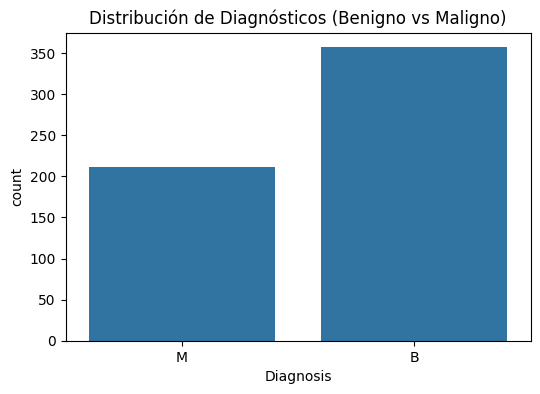

In [17]:
# Configuramos el tamaño del gráfico
plt.figure(figsize=(6, 4))

# Usamos seaborn para contar automáticamente los casos en la columna 'Diagnosis'
# x='Diagnosis' indica qué columna contar
# data=df indica de dónde sacar los datos
sns.countplot(x='Diagnosis', data=df)

# Añadimos título para que el gráfico sea entendible
plt.title("Distribución de Diagnósticos (Benigno vs Maligno)")
plt.show()

## **7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).**

In [18]:
# Creamos un diccionario que define la regla de traducción
mapa_diagnostico = {'B': 0, 'M': 1}

# Usamos el método .map() para aplicar esta regla a toda la columna
df['DiagnosisNumeric'] = df['Diagnosis'].map(mapa_diagnostico)

# Verificamos mostrando ambas columnas una al lado de la otra
print(df[['Diagnosis', 'DiagnosisNumeric']])
df

    Diagnosis  DiagnosisNumeric
0           M                 1
1           M                 1
2           M                 1
3           M                 1
4           M                 1
..        ...               ...
564         M                 1
565         M                 1
566         M                 1
567         M                 1
568         B                 0

[569 rows x 2 columns]


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1


## **8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: (x - mean(x)) / std(x)**

In [19]:
# Excluimos 'Diagnosis' y 'DiagnosisNumeric'
columnas_a_normalizar = df.select_dtypes(include=['float64', 'int64']).columns.drop('DiagnosisNumeric', errors='ignore')

df_normalizado = (df[columnas_a_normalizar] - df[columnas_a_normalizar].mean()) / df[columnas_a_normalizar].std()

# Agregamos de vuelta la columna objetivo para no perderla
df_normalizado['Diagnosis'] = df['Diagnosis']
df_normalizado['DiagnosisNumeric'] = df['DiagnosisNumeric']

# Verificamos.
print("Estadísticas después de normalizar (Media ~ 0, Std ~ 1):")
display(df_normalizado.describe().T.head())

Estadísticas después de normalizar (Media ~ 0, Std ~ 1):


,count,mean,std,min,25%,50%,75%,max
Radius1,569.0,-1.311195e-16,1.0,-2.027864,-0.688779,-0.214893,0.468980,3.967796
Texture1,569.0,6.243785e-17,1.0,-2.227289,-0.725325,-0.104544,0.583662,4.647799
Perimeter1,569.0,-1.123881e-16,1.0,-1.982759,-0.691347,-0.235773,0.499238,3.972634
Area1,569.0,-2.185325e-16,1.0,-1.453164,-0.666609,-0.294927,0.363188,5.245913
Smoothness1,569.0,-8.366672e-16,1.0,-3.109349,-0.710338,-0.034860,0.635640,4.766717


## **9. Agrupar características similares y calcular su promedio. Para las siguientes características: ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"] Usa expresiones regulares para identificar patrones comunes, como radius1 , radius2 , radius3 , etc., y calcular los promedios. Por ejemplo: re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0). También puedes utilizar el método startswith() para buscar estos patrones en los nombres de las columnas.**

In [20]:
import re

# Trabajaremos sobre una copia del DataFrame normalizado para no afectar el anterior
df_agrupado = df_normalizado.copy()

# Lista de raíces de las características
patrones_base = [
    'Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
    'Compactness', 'Concavity', 'ConcavePoints', 'Symmetry', 'FractalDimension'
]

for patron in patrones_base:
    # 1. Buscamos columnas en el DF NORMALIZADO que coincidan con el patrón
    # (Esto buscará RadiusMean, RadiusSe, RadiusWorst dentro de df_normalizado)
    r = re.compile(f"^{patron}.*")
    columnas_similares = list(filter(r.match, df_agrupado.columns))

    # 2. Calculamos el promedio de estas columnas normalizadas
    # Guardamos el resultado con el nombre solicitado (ej: RadiusMean)
    nombre_final = f"{patron}Mean"
    df_agrupado[nombre_final] = df_agrupado[columnas_similares].mean(axis=1)

    print(f"Grupo normalizado '{patron}': {columnas_similares} -> Promediado en '{nombre_final}'")

# Verificamos
print("\nNuevas variables agrupadas (basadas en datos normalizados):")
print(df_agrupado.filter(like='Mean').columns.tolist()[:5])

Grupo normalizado 'Radius': ['Radius1', 'Radius2', 'Radius3'] -> Promediado en 'RadiusMean'
Grupo normalizado 'Texture': ['Texture1', 'Texture2', 'Texture3'] -> Promediado en 'TextureMean'
Grupo normalizado 'Perimeter': ['Perimeter1', 'Perimeter2', 'Perimeter3'] -> Promediado en 'PerimeterMean'
Grupo normalizado 'Area': ['Area1', 'Area2', 'Area3'] -> Promediado en 'AreaMean'
Grupo normalizado 'Smoothness': ['Smoothness1', 'Smoothness2', 'Smoothness3'] -> Promediado en 'SmoothnessMean'
Grupo normalizado 'Compactness': ['Compactness1', 'Compactness2', 'Compactness3'] -> Promediado en 'CompactnessMean'
Grupo normalizado 'Concavity': ['Concavity1', 'Concavity2', 'Concavity3'] -> Promediado en 'ConcavityMean'
Grupo normalizado 'ConcavePoints': ['ConcavePoints1', 'ConcavePoints2', 'ConcavePoints3'] -> Promediado en 'ConcavePointsMean'
Grupo normalizado 'Symmetry': ['Symmetry1', 'Symmetry2', 'Symmetry3'] -> Promediado en 'SymmetryMean'
Grupo normalizado 'FractalDimension': ['FractalDimension1

## **10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.**

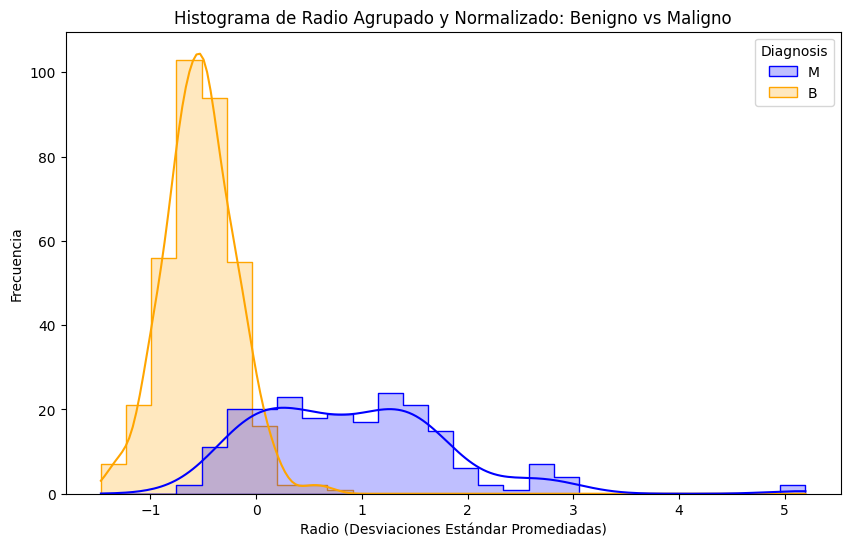

In [21]:
plt.figure(figsize=(10, 6))

# Usamos el DataFrame 'df_agrupado' que creamos en el punto 9
# Este contiene las variables normalizadas y promediadas
sns.histplot(
    data=df_agrupado,
    x='RadiusMean',   # Esta es ahora la variable agrupada (promedio de Mean, SE, Worst normalizados)
    hue='Diagnosis',  # Separar por diagnóstico
    palette={'B': 'orange', 'M': 'blue'}, # Colores requeridos
    kde=True,         # Curva de densidad suave
    element="step"    # Estilo visual limpio
)

plt.title("Histograma de Radio Agrupado y Normalizado: Benigno vs Maligno")
plt.xlabel("Radio (Desviaciones Estándar Promediadas)")
plt.ylabel("Frecuencia")
plt.show()

## **11. Generar gráficos de violín para múltiples características. Para las columnas:**

- RadiusMean
- TextureMean
- PerimeterMean
- AreaMean
- SmoothnessMean
- CompactnessMean
- ConcavityMean
- ConcavePointsMean
- Symmetry3
- FractalDimension3

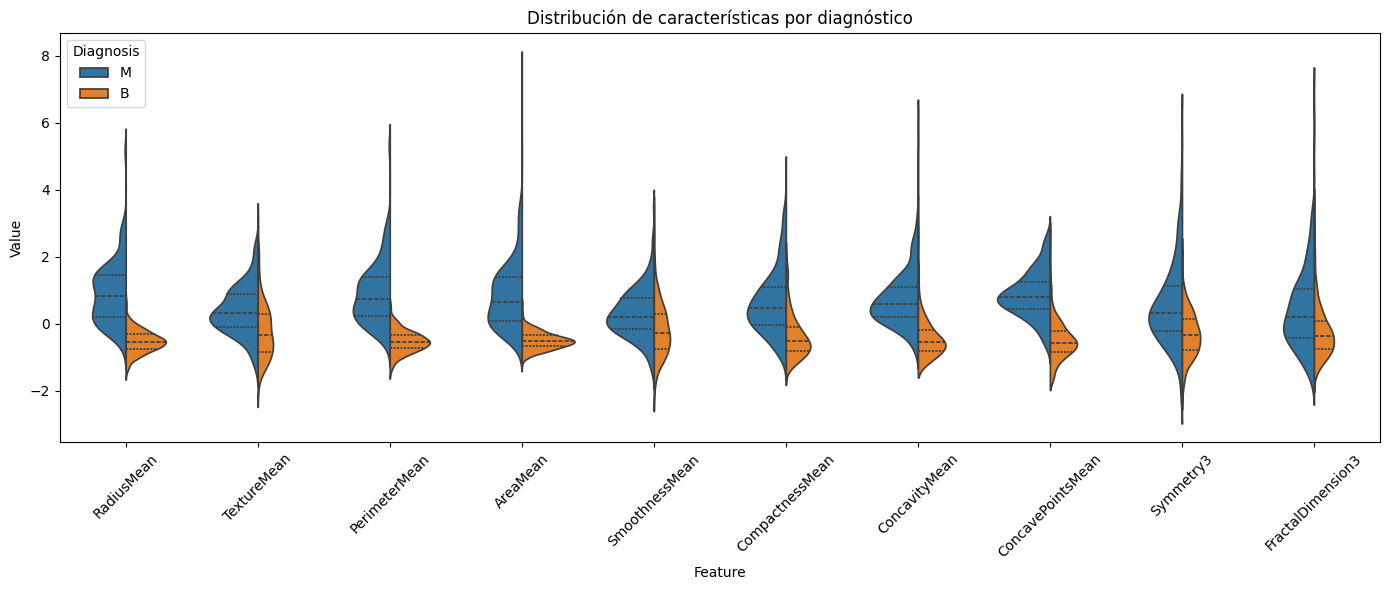

In [23]:
# Columnas a analizar
features = [
    "RadiusMean", "TextureMean", "PerimeterMean", "AreaMean",
    "SmoothnessMean", "CompactnessMean", "ConcavityMean",
    "ConcavePointsMean", "Symmetry3", "FractalDimension3"
]

# Conversión a formato largo usando el DataFrame correcto
data = pd.melt(
    df_agrupado[features + ["Diagnosis"]],
    id_vars="Diagnosis",
    var_name="Feature",
    value_name="Value"
)

# Gráfico de violín múltiple
plt.figure(figsize=(14, 6))
sns.violinplot(
    x="Feature",
    y="Value",
    hue="Diagnosis",
    data=data,
    split=True,
    inner="quart"
)

plt.xticks(rotation=45)
plt.title("Distribución de características por diagnóstico")
plt.tight_layout()
plt.show()


## **12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.**

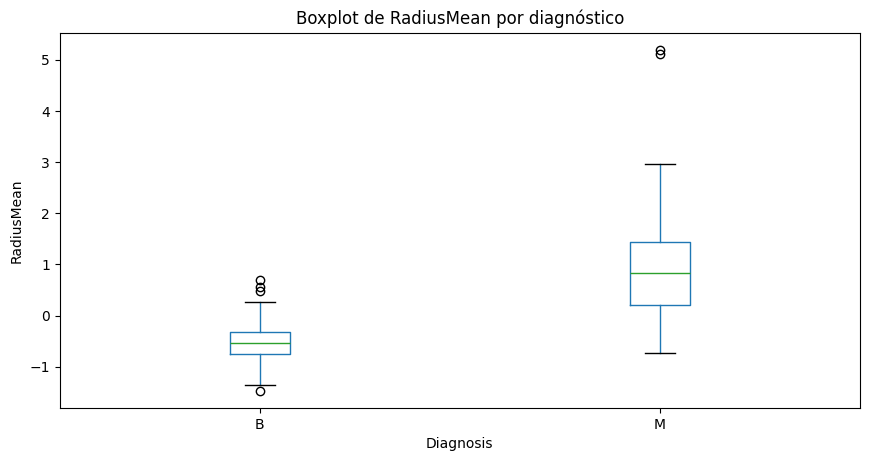

In [24]:
df_agrupado.boxplot(
    column="RadiusMean",
    by="Diagnosis",
    figsize=(10, 5),
    grid=False
)

plt.title("Boxplot de RadiusMean por diagnóstico")
plt.suptitle("")
plt.xlabel("Diagnosis")
plt.ylabel("RadiusMean")
plt.show()

In [25]:
# Cálculo de cuartiles
Q1 = df_agrupado["RadiusMean"].quantile(0.25)
Q3 = df_agrupado["RadiusMean"].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Eliminación de outliers
df_agrupado_sin_outliers = df_agrupado[
    (df_agrupado["RadiusMean"] >= limite_inferior) &
    (df_agrupado["RadiusMean"] <= limite_superior)
]

# Visualización del tamaño del DataFrame
print("Tamaño original:", df_agrupado.shape)
print("Tamaño sin outliers:", df_agrupado_sin_outliers.shape)

Tamaño original: (569, 42)
Tamaño sin outliers: (547, 42)


## **13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.**

In [26]:
# Selección de variables numéricas
df_numerico = df_agrupado.select_dtypes(include="number")

# Cálculo de la matriz de correlación
matriz_correlacion = df_numerico.corr()

matriz_correlacion


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
Radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.952807,0.206682,0.946132,0.933757,0.027819,0.409193,0.511256,0.721257,0.084124,-0.130364
Texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.342549,0.907474,0.347735,0.324001,0.024992,0.256841,0.273109,0.279395,0.075265,0.036505
Perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.956572,0.215501,0.955588,0.936818,0.063844,0.459313,0.551567,0.753377,0.117850,-0.081094
Area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.965051,0.214113,0.958721,0.967050,0.055054,0.400434,0.514317,0.711863,0.090206,-0.112361
Smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.246480,0.032017,0.266286,0.220901,0.879755,0.527324,0.440825,0.533608,0.467672,0.513529
Compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.553602,0.209669,0.608490,0.513002,0.559684,0.946844,0.830191,0.849723,0.544740,0.660844
Concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.718365,0.267897,0.755600,0.693718,0.440092,0.839178,0.941909,0.915431,0.441418,0.488485
ConcavePoints1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.845701,0.239935,0.867341,0.814209,0.425577,0.723080,0.772787,0.937636,0.378724,0.297805
Symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.229097,0.114541,0.256910,0.193619,0.482234,0.544397,0.467052,0.477429,0.871754,0.469377
FractalDimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.203327,0.014398,-0.153122,-0.212081,0.613898,0.575844,0.413154,0.253710,0.470142,0.921927


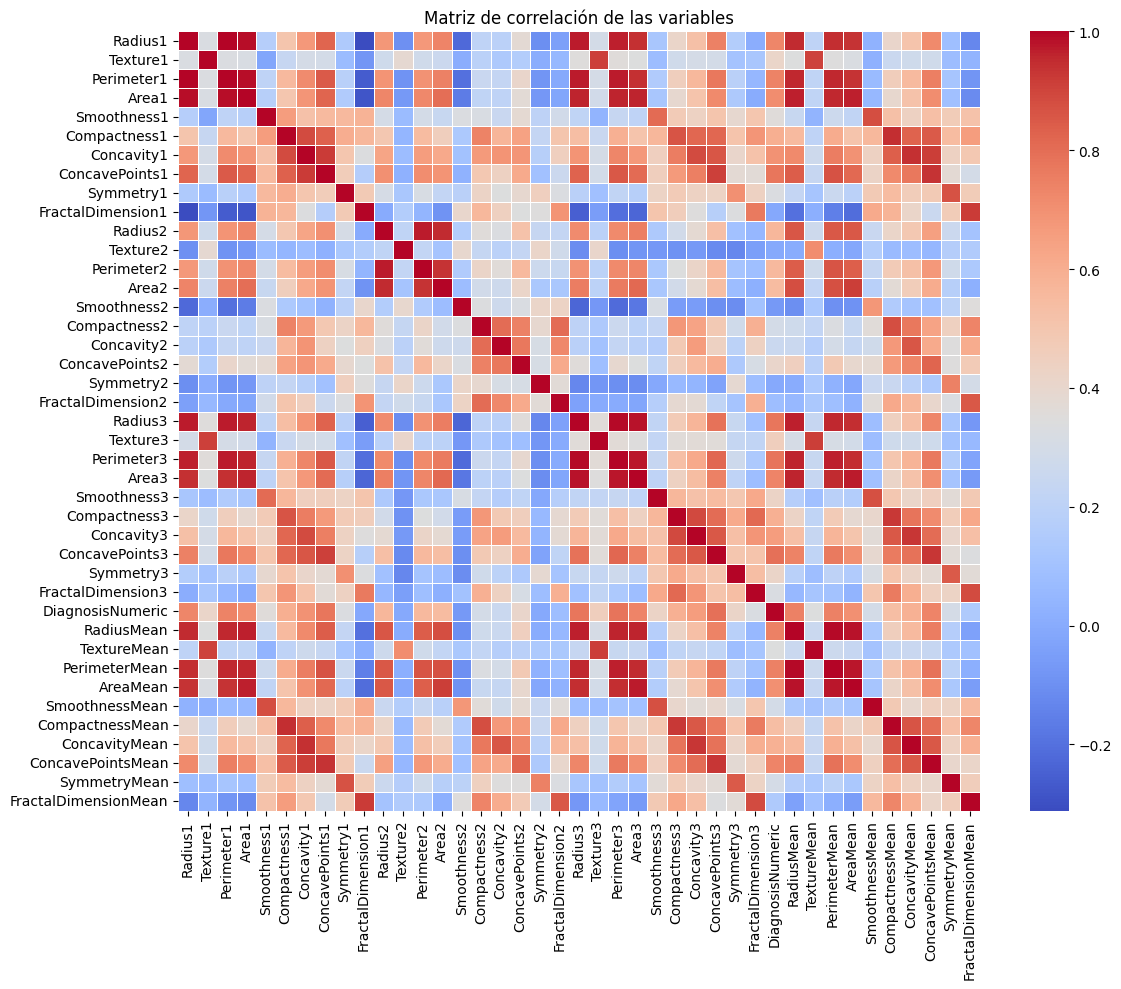

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    matriz_correlacion,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Matriz de correlación de las variables")
plt.tight_layout()
plt.show()


## **14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?**

El gráfico de dispersión permite analizar la relación entre dos variables numéricas y observar posibles patrones o separaciones según el diagnóstico.
Por su parte, el gráfico de pares (pairplot) facilita la visualización simultánea de múltiples relaciones entre variables, ayudando a identificar correlaciones y tendencias generales dentro del conjunto de datos.

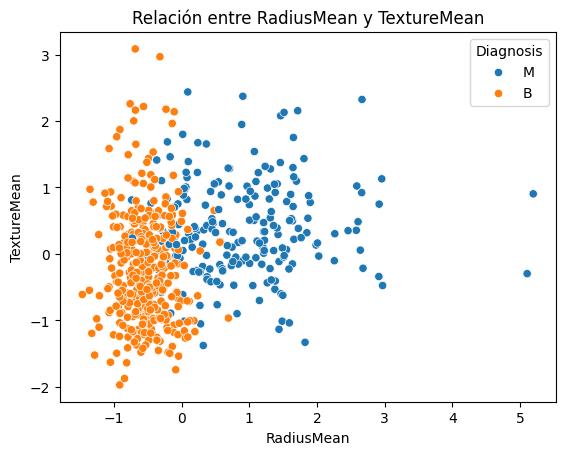

In [28]:
sns.scatterplot(
    data=df_agrupado,
    x="RadiusMean",
    y="TextureMean",
    hue="Diagnosis"
)

plt.title("Relación entre RadiusMean y TextureMean")
plt.show()


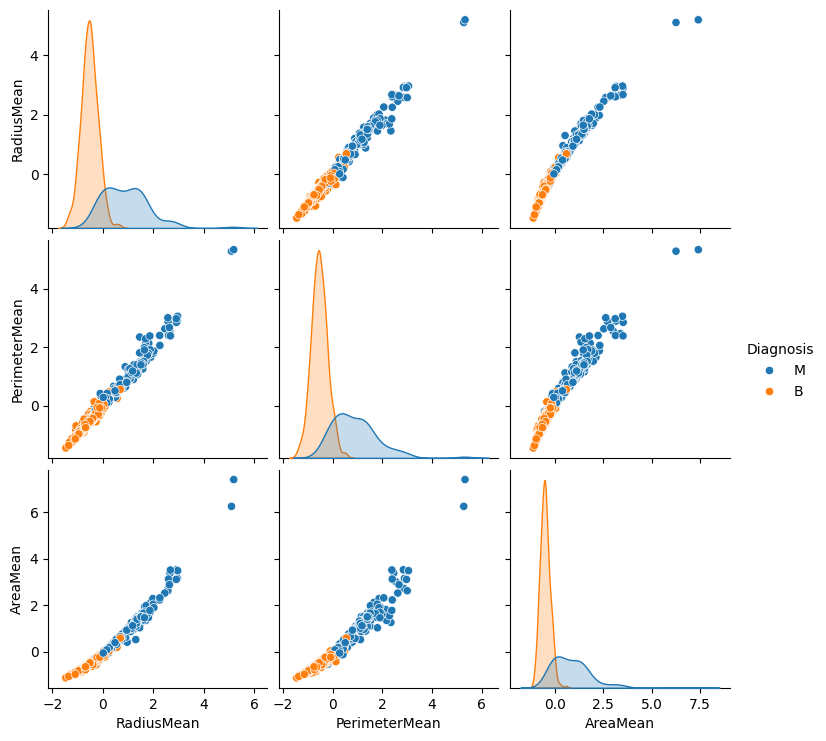

In [29]:
sns.pairplot(
    df_agrupado,
    vars=["RadiusMean", "PerimeterMean", "AreaMean"],
    hue="Diagnosis"
)